In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\RESHMA\Downloads\market_sales - LMS.csv")   # univariate,bivariate,metrics,standardization-feature scaling
df

,TV_Ad_Spend,Social_Media_Spend,Discount_Offers,Search_Engine_Marketing_Spend,Product_Category,Region,Customer_Segment,Website_Traffic,Conversion_Rate,Sales
0,22483.0,17282.0,30.0,10516,Electronics,East,Budget,1000,2.11,96119
1,19308.0,18872.0,5.0,10413,Home Appliances,North,Budget,1000,2.15,82430
2,23238.0,13674.0,15.0,5715,Home Appliances,East,Mid-tier,1000,3.50,115771
3,27615.0,12551.0,20.0,10844,FMCG,South,Mid-tier,1825,2.14,83833
4,18829.0,10659.0,15.0,14564,Sports,East,Mid-tier,1000,2.55,103896
...,...,...,...,...,...,...,...,...,...,...
2495,24066.0,14804.0,0.0,10249,Fashion,West,Premium,1000,2.41,82724
2496,18605.0,17845.0,30.0,10193,Electronics,North,Premium,1038,2.47,99914
2497,18601.0,27451.0,0.0,19435,NaN,South,Premium,1053,2.19,110831
2498,23951.0,18232.0,NaN,2291,Electronics,West,Mid-tier,1000,1.50,58640


In [3]:
df.columns

Index(['TV_Ad_Spend', 'Social_Media_Spend', 'Discount_Offers',
       'Search_Engine_Marketing_Spend', 'Product_Category', 'Region',
       'Customer_Segment', 'Website_Traffic', 'Conversion_Rate', 'Sales'],
      dtype='object')

In [4]:
df.head(2)

,TV_Ad_Spend,Social_Media_Spend,Discount_Offers,Search_Engine_Marketing_Spend,Product_Category,Region,Customer_Segment,Website_Traffic,Conversion_Rate,Sales
0,22483.0,17282.0,30.0,10516,Electronics,East,Budget,1000,2.11,96119
1,19308.0,18872.0,5.0,10413,Home Appliances,North,Budget,1000,2.15,82430


In [5]:
df.tail(2)

,TV_Ad_Spend,Social_Media_Spend,Discount_Offers,Search_Engine_Marketing_Spend,Product_Category,Region,Customer_Segment,Website_Traffic,Conversion_Rate,Sales
2498,23951.0,18232.0,NaN,2291,Electronics,West,Mid-tier,1000,1.50,58640
2499,NaN,11607.0,NaN,11371,Fashion,East,Mid-tier,1000,2.38,93258


In [6]:
df.shape

(2500, 10)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TV_Ad_Spend                    2405 non-null   float64
 1   Social_Media_Spend             2344 non-null   float64
 2   Discount_Offers                2318 non-null   float64
 3   Search_Engine_Marketing_Spend  2500 non-null   int64  
 4   Product_Category               2333 non-null   object 
 5   Region                         2373 non-null   object 
 6   Customer_Segment               2500 non-null   object 
 7   Website_Traffic                2500 non-null   int64  
 8   Conversion_Rate                2500 non-null   float64
 9   Sales                          2500 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 195.4+ KB


In [8]:
df.isnull().sum()

TV_Ad_Spend                       95
Social_Media_Spend               156
Discount_Offers                  182
Search_Engine_Marketing_Spend      0
Product_Category                 167
Region                           127
Customer_Segment                   0
Website_Traffic                    0
Conversion_Rate                    0
Sales                              0
dtype: int64

In [9]:
df["Region"].value_counts()

Region
East     608
West     598
North    590
South    577
Name: count, dtype: int64

In [10]:
df["Region"].mode()

0    East
Name: Region, dtype: object

In [11]:
df["Product_Category"].value_counts()

Product_Category
Fashion            508
Electronics        476
FMCG               462
Sports             451
Home Appliances    436
Name: count, dtype: int64

In [12]:
df["Product_Category"].mode()

0    Fashion
Name: Product_Category, dtype: object

In [13]:
df["Customer_Segment"].value_counts()

Customer_Segment
Mid-tier    868
Premium     819
Budget      813
Name: count, dtype: int64

In [14]:
df["Customer_Segment"].mode()

0    Mid-tier
Name: Customer_Segment, dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   TV_Ad_Spend                    2405 non-null   float64
 1   Social_Media_Spend             2344 non-null   float64
 2   Discount_Offers                2318 non-null   float64
 3   Search_Engine_Marketing_Spend  2500 non-null   int64  
 4   Product_Category               2333 non-null   object 
 5   Region                         2373 non-null   object 
 6   Customer_Segment               2500 non-null   object 
 7   Website_Traffic                2500 non-null   int64  
 8   Conversion_Rate                2500 non-null   float64
 9   Sales                          2500 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 195.4+ KB


In [16]:
df['Region'] = df.groupby(
    ['Customer_Segment']
)['Region'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
)

In [17]:
df['Product_Category'] = df.groupby(
    ['Customer_Segment']
)['Product_Category'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
)

In [18]:
df['TV_Ad_Spend'] = df.groupby(
    ['Customer_Segment']
)['TV_Ad_Spend'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
)

In [19]:
df['Social_Media_Spend'] = df.groupby(
    ['Customer_Segment']
)['Social_Media_Spend'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
)

In [20]:
df['Discount_Offers'] = df.groupby(
    ['Customer_Segment']
)['Discount_Offers'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
)

In [21]:
df.isnull().sum()

TV_Ad_Spend                      0
Social_Media_Spend               0
Discount_Offers                  0
Search_Engine_Marketing_Spend    0
Product_Category                 0
Region                           0
Customer_Segment                 0
Website_Traffic                  0
Conversion_Rate                  0
Sales                            0
dtype: int64

In [22]:
import matplotlib .pyplot as plt
import seaborn as sns

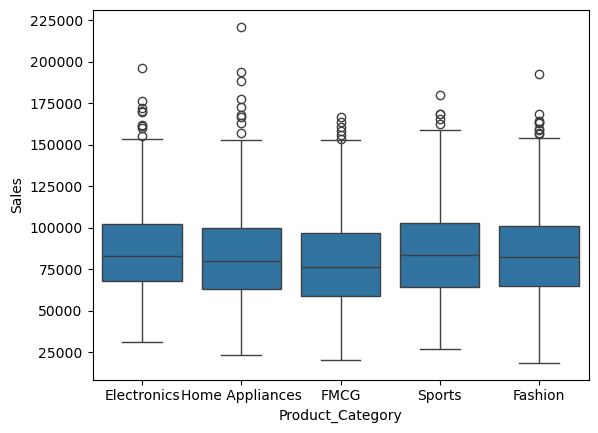

In [23]:
               # Bivariate Analysis
# Compare distributions across categories
# to check for outliers
sns.boxplot(x="Product_Category", y="Sales", data=df)
plt.show()


<Axes: >

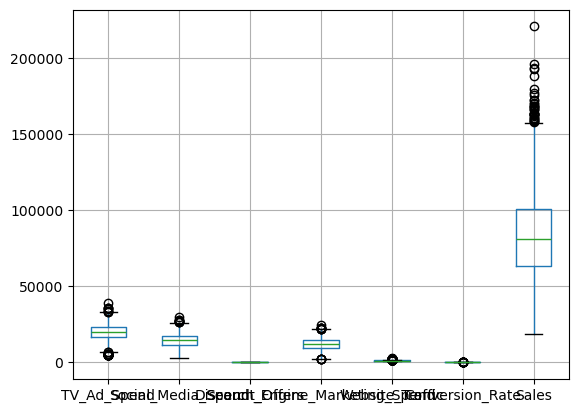

In [24]:
df.boxplot()

In [25]:
n_col = df.select_dtypes(include='number').columns

for col in n_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR

    outlier = df[(df[col] < lb) | (df[col] > ub)]
print(f"lower_bound is {lb} ,upper_bound is {ub}")

lower_bound is 6800.875 ,upper_bound is 157621.875


In [26]:
## outlier
n_col = df.select_dtypes(include='number').columns

for col in n_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR

    outlier = df[(df[col] < lb) | (df[col] > ub)]

    print(f"{col} → lower_bound: {lb}, upper_bound: {ub}")
    print(f"Number of outliers: {outlier.shape[0]}\n")


TV_Ad_Spend → lower_bound: 6741.25, upper_bound: 33085.25
Number of outliers: 49

Social_Media_Spend → lower_bound: 2742.75, upper_bound: 26112.75
Number of outliers: 9

Discount_Offers → lower_bound: -5.0, upper_bound: 35.0
Number of outliers: 0

Search_Engine_Marketing_Spend → lower_bound: 2108.0, upper_bound: 21766.0
Number of outliers: 15

Website_Traffic → lower_bound: 581.5, upper_bound: 1697.5
Number of outliers: 191

Conversion_Rate → lower_bound: 0.36499999999999977, upper_bound: 3.845
Number of outliers: 23

Sales → lower_bound: 6800.875, upper_bound: 157621.875
Number of outliers: 33



In [27]:
import warnings
warnings.filterwarnings("ignore")

n_col = df.select_dtypes(include='number').columns
n_col

for col in n_col:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1

    lb = q1 - 1.5 * IQR
    ub = q3 + 1.5 * IQR

    outlier = df[(df[col] < lb) | (df[col] > ub)]

    print(f"{col} → lower_bound: {lb}, upper_bound: {ub}")
    print(f"Number of outliers: {outlier.shape[0]}\n")
    df.loc[(df[col]<lb | (df[col]>ub,col))]= np.nan

TV_Ad_Spend → lower_bound: 6741.25, upper_bound: 33085.25
Number of outliers: 49



NameError: name 'np' is not defined

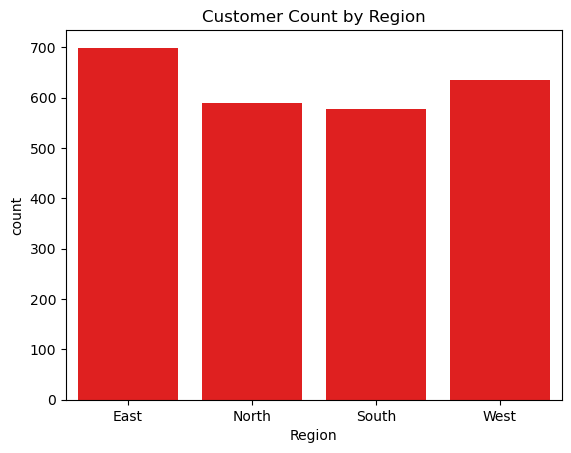

In [28]:
# For distribution of categorical data
sns.countplot(x="Region", data=df,color="red")
plt.title("Customer Count by Region")
plt.show()




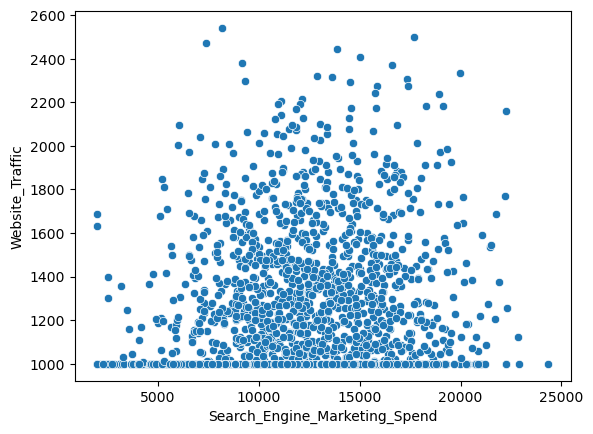

In [29]:
# Search_Engine_Marketing_Spend vs Website_Traffic 
# Both variables are continuous

sns.scatterplot(x="Search_Engine_Marketing_Spend", y="Website_Traffic", data=df)
plt.show()





In [30]:
# Inferences for Bivariate Analysis
       # Boxplot
# A wide interquartile range (IQR)
# Many upper outliers
# Spending is more controlled and consistent compared to sales.
       # countplot
# Customer Count by Region:
# It Indicates the largest customer base among all regions.
# Represents a strong secondary market.
        # Scatterplot
# Some show high spend but average traffic.

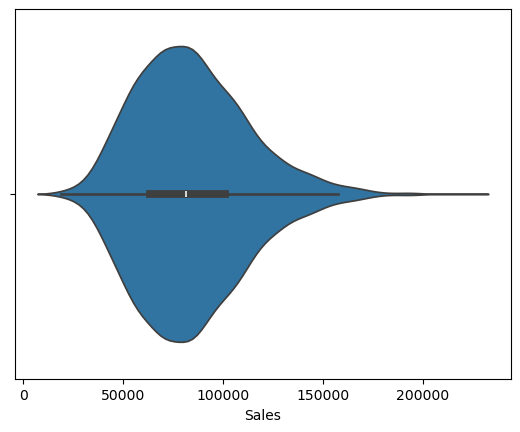

In [31]:
          # Univariate Analysis
# Shows the full distribution shape
# skewness
sns.violinplot(x=df["Sales"])
plt.show()


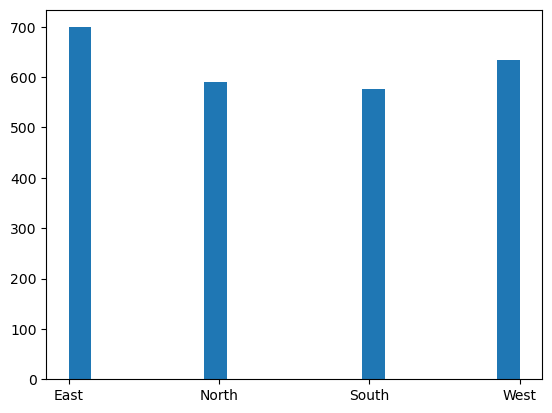

In [32]:
plt.hist(df["Region"], bins=20)
plt.show()


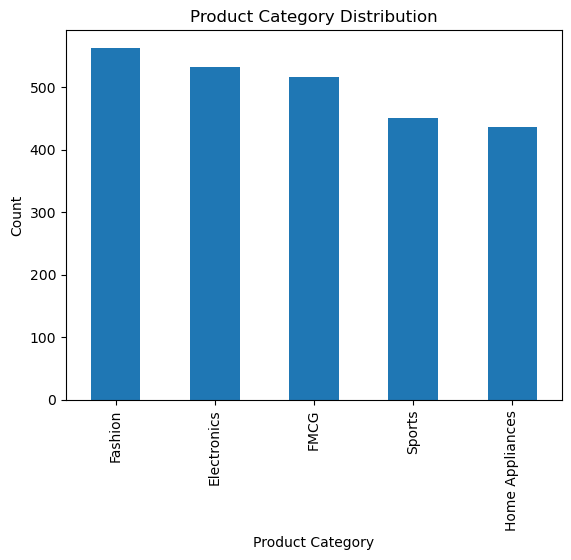

In [33]:
plt.figure()
df["Product_Category"].value_counts().plot(kind="bar")
plt.xlabel("Product Category")
plt.ylabel("Count")
plt.title("Product Category Distribution")
plt.show()

In [34]:
# Inferences for Univariate Analysis
           # violinplot
# very high sales values
# Potential outliers or peak events
           # histogram
# A strong market presence.
# The largest customer base among all regions.
# East region is the highest.
           # barplot
# Indicates highest customer preference / demand.
# Balanced data values.

In [35]:
# NAN for Mean

In [36]:
n_col = df.select_dtypes(include='number').columns

for col in n_col:
    df[col] = df[col].fillna(df[col].mean())

print(df)


      TV_Ad_Spend  Social_Media_Spend  Discount_Offers  \
0         22483.0             17282.0             30.0   
1         19308.0             18872.0              5.0   
2         23238.0             13674.0             15.0   
3         27615.0             12551.0             20.0   
4         18829.0             10659.0             15.0   
...           ...                 ...              ...   
2495      24066.0             14804.0              0.0   
2496      18605.0             17845.0             30.0   
2497      18601.0             27451.0              0.0   
2498      23951.0             18232.0             10.0   
2499       9233.0             11607.0             10.0   

      Search_Engine_Marketing_Spend Product_Category Region Customer_Segment  \
0                             10516      Electronics   East           Budget   
1                             10413  Home Appliances  North           Budget   
2                              5715  Home Appliances   East    

In [37]:
import seaborn as sns
import matplotlib .pyplot as plt

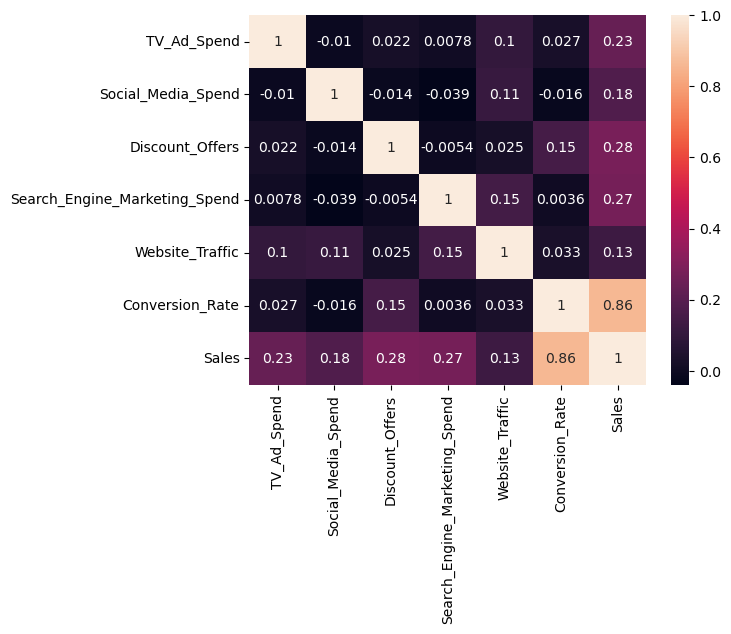

In [38]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True)
plt.show()

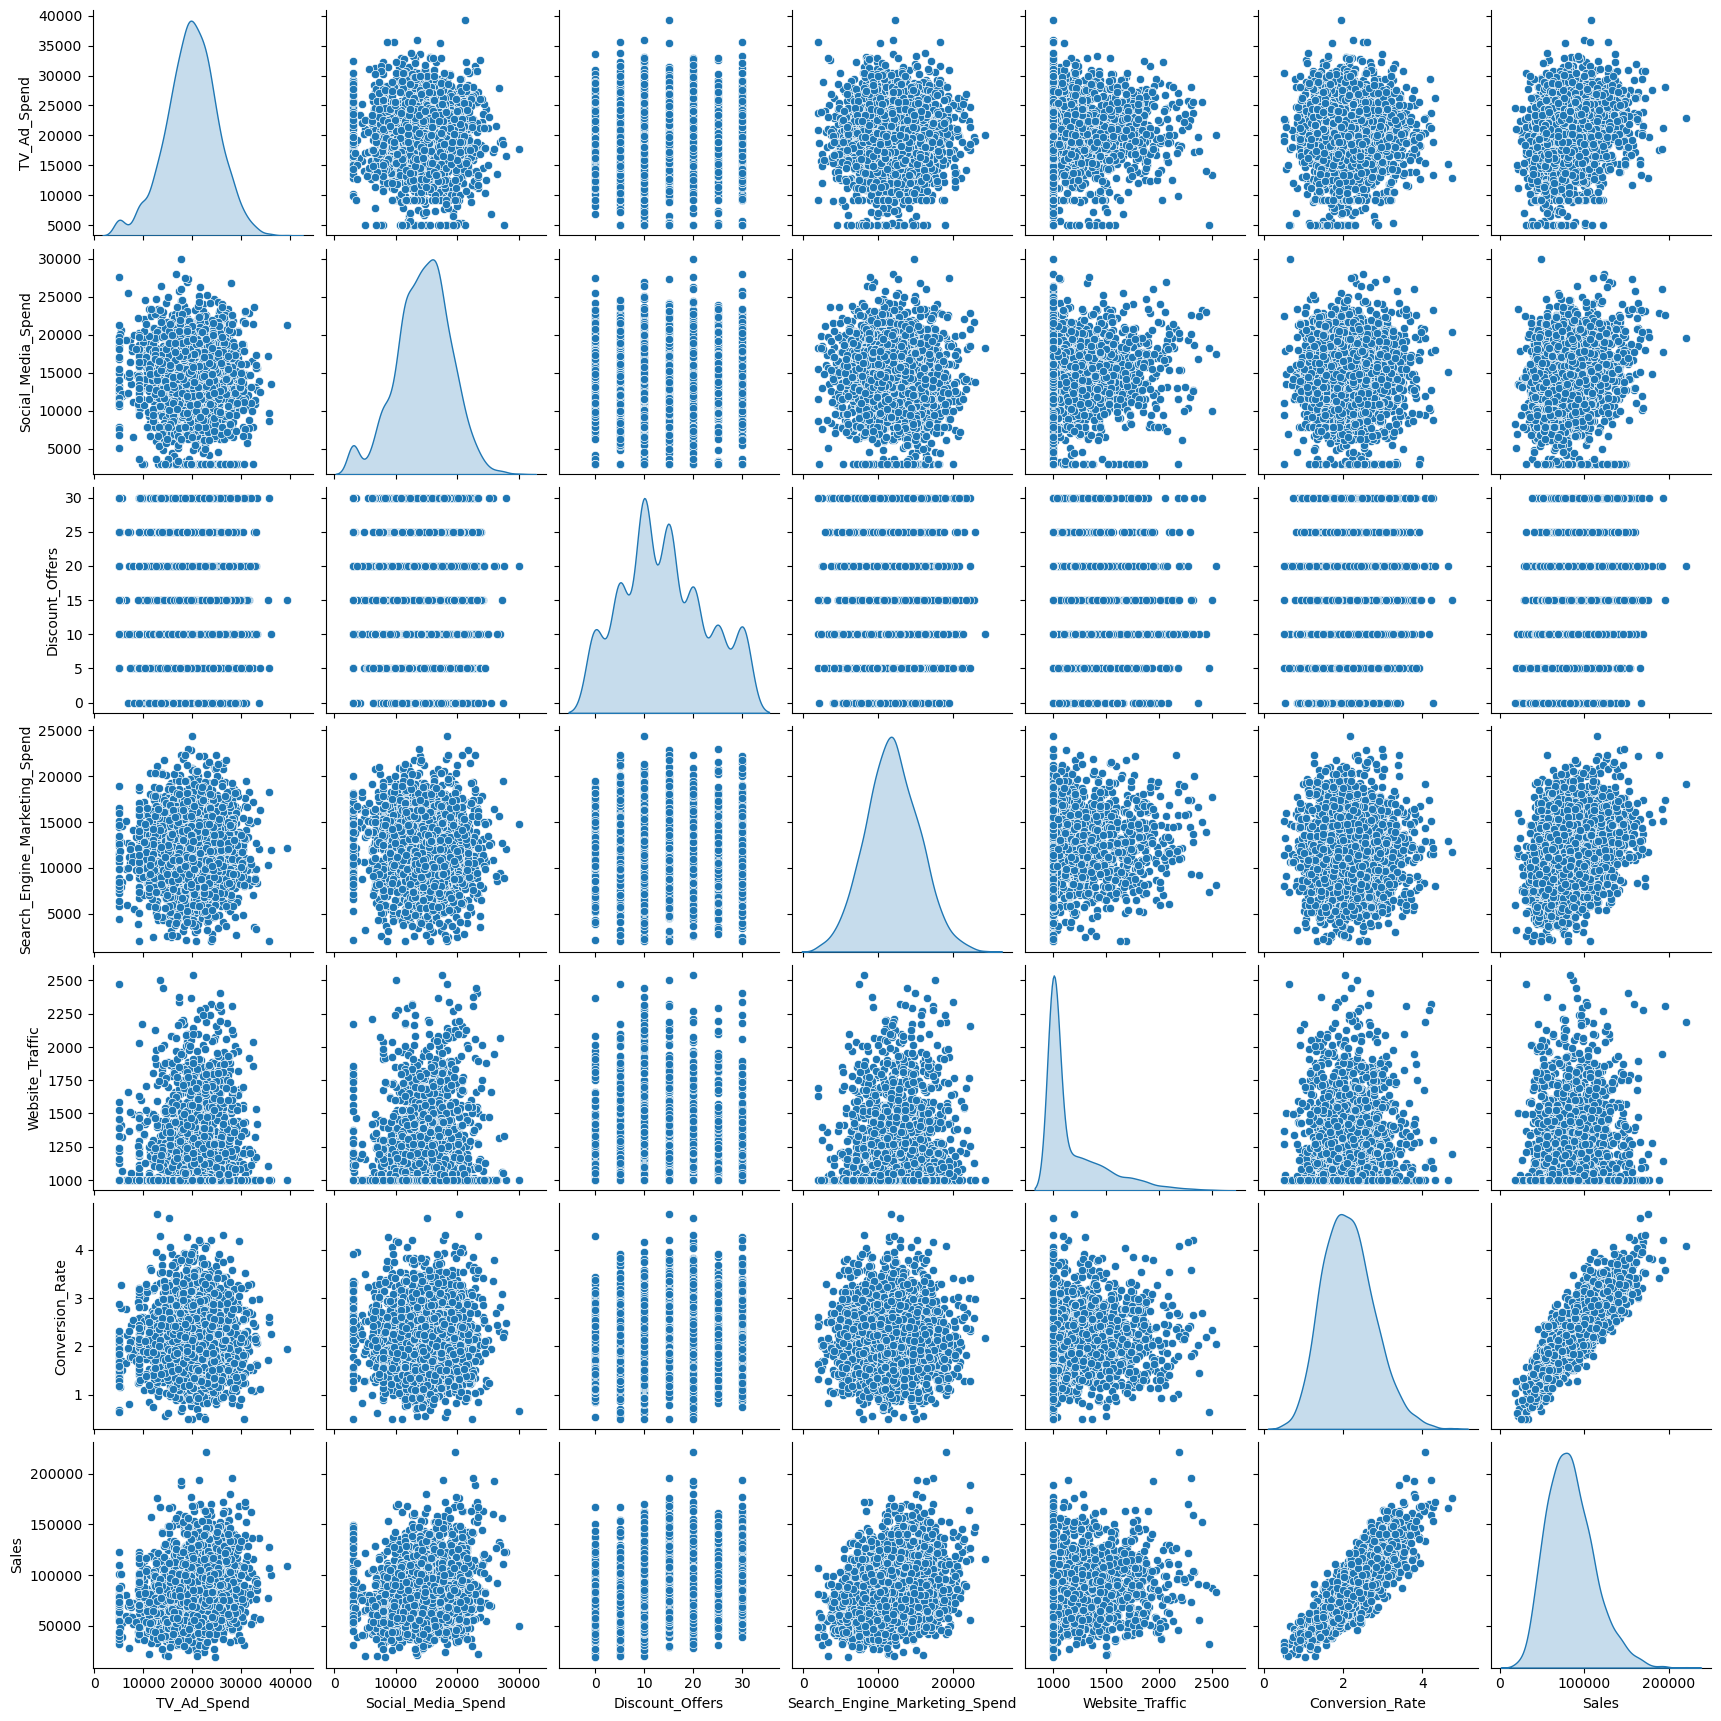

In [39]:
sns.pairplot(df, diag_kind="kde")
plt.show()


In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
df.columns

Index(['TV_Ad_Spend', 'Social_Media_Spend', 'Discount_Offers',
       'Search_Engine_Marketing_Spend', 'Product_Category', 'Region',
       'Customer_Segment', 'Website_Traffic', 'Conversion_Rate', 'Sales'],
      dtype='object')

In [43]:
df=df.drop(columns=['Website_Traffic'])

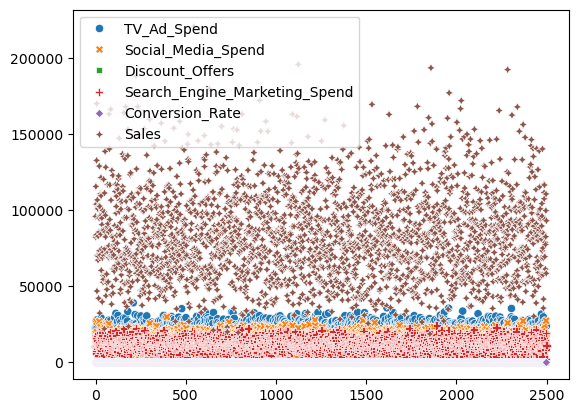

In [44]:
df = df.select_dtypes(include="number")
sns.scatterplot(df)
plt.show()                               # fist check the relationship
                                         # Prepare data for Linear Regression
                                         # Train–Test Split
                                         # Train Linear Regression Model
                                         # Predictions
                                         # Model Evaluation

In [45]:
X = df.drop(columns="Sales")
y = df[["Sales"]]

In [46]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)            # standardization
x_test  = scaler.transform(x_test)

y_train = scaler.fit_transform(y_train)
y_test = scaler.transform(y_test)

In [48]:
x_train

array([[-0.72958147, -0.12737994,  0.67100137, -1.6594061 , -1.5580168 ],
       [ 0.31658249,  1.81880839,  1.25549733,  0.26315626,  1.41686486],
       [ 1.2813108 , -0.39557777,  0.67100137,  0.02388785, -0.08607014],
       ...,
       [ 0.35048244,  0.68445603, -1.08248653,  0.33159881,  0.09985996],
       [ 0.12378834,  0.1516816 ,  1.25549733, -1.1340254 ,  0.64215609],
       [ 0.23836639, -0.89960863, -1.08248653,  1.2558537 ,  1.09148718]],
      shape=(2000, 5))

In [49]:
x_test

array([[ 0.60141786,  0.53213777,  0.67100137, -0.41762268,  1.41686486],
       [ 0.18874747,  0.77181836, -1.08248653, -0.16797568,  0.31677841],
       [-0.29702562,  1.01217794, -1.66698249,  0.21210486, -1.18615659],
       ...,
       [-0.20934027,  1.08754493,  1.25549733,  0.43734816, -1.43406339],
       [-0.71935467,  1.1371106 , -1.08248653,  0.97422944,  2.74936393],
       [-1.99278089,  0.46763449, -1.08248653, -0.36432725, -0.10156432]],
      shape=(500, 5))

In [50]:
y_train

array([[-1.51504229],
       [ 2.1018862 ],
       [ 0.09569258],
       ...,
       [ 0.15898332],
       [ 0.35514126],
       [ 1.14020653]], shape=(2000, 1))

In [51]:
y_test

array([[ 1.59534353e+00],
       [ 4.12796526e-01],
       [-1.19869696e+00],
       [ 3.14645305e-01],
       [ 2.54316803e-01],
       [-9.13708012e-01],
       [-8.86108626e-01],
       [-1.01601359e+00],
       [-8.52929233e-02],
       [-9.57491332e-01],
       [-1.02927141e+00],
       [-1.91391611e-01],
       [-1.37596161e+00],
       [ 5.30202293e-01],
       [ 1.95865116e+00],
       [ 2.45580136e+00],
       [-3.14505105e-01],
       [ 1.11695891e-01],
       [ 5.38872257e-01],
       [-1.02186582e+00],
       [ 1.37700493e+00],
       [ 6.08015222e-01],
       [-6.52886586e-01],
       [-1.35096321e+00],
       [-6.80305348e-01],
       [ 4.87105345e-01],
       [ 1.69404058e-02],
       [ 1.43521885e-01],
       [-7.53855546e-01],
       [-7.55734038e-01],
       [-4.05214606e-01],
       [-1.24341953e+00],
       [ 8.67427779e-01],
       [ 8.59119063e-01],
       [ 2.52185437e-01],
       [ 4.04124884e+00],
       [-2.85046571e-02],
       [-5.61996461e-01],
       [-9.0

In [52]:
lr = LinearRegression()
model = lr.fit(x_train,y_train)

In [53]:
y_pred = model.predict(x_test)

In [61]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = x_test.shape[0]
p = x_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)
print("Adjusted R2:", adj_r2)


MAE: 0.21214584784477458
MSE: 0.07380002534950428
RMSE: 0.27166160080052587
R² Score: 0.9316933923822767
Adjusted R2: 0.9310020299569961


In [62]:
residuals = y_test - y_pred
residuals

array([[ 0.18255193],
       [ 0.16467885],
       [-0.14991636],
       [-0.21742276],
       [ 0.17167286],
       [ 0.01152487],
       [-0.13779611],
       [-0.09583684],
       [-0.08605327],
       [-0.24466191],
       [-0.47352243],
       [-0.07513479],
       [-0.32987251],
       [-0.145798  ],
       [ 0.32120928],
       [ 0.34660395],
       [-0.30366248],
       [-0.11092983],
       [ 0.03414086],
       [-0.02640052],
       [-0.18952863],
       [ 0.74793805],
       [-0.03878989],
       [ 0.15123349],
       [-0.12121577],
       [-0.25762211],
       [-0.33027061],
       [-0.07765416],
       [-0.66186189],
       [-0.15805326],
       [ 0.04523299],
       [ 0.38239545],
       [ 0.69531426],
       [-0.0554424 ],
       [-0.20021086],
       [ 1.02662958],
       [ 0.26252453],
       [-0.12483887],
       [-0.04598569],
       [-0.21812438],
       [-0.26052233],
       [-0.54635167],
       [ 0.22281047],
       [-0.40416486],
       [-0.2157811 ],
       [-0

In [63]:
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print("Durbin_Watson:",dw)

Durbin_Watson: [1.86073312]


Text(0.5, 1.0, 'Homoscedasticity Check')

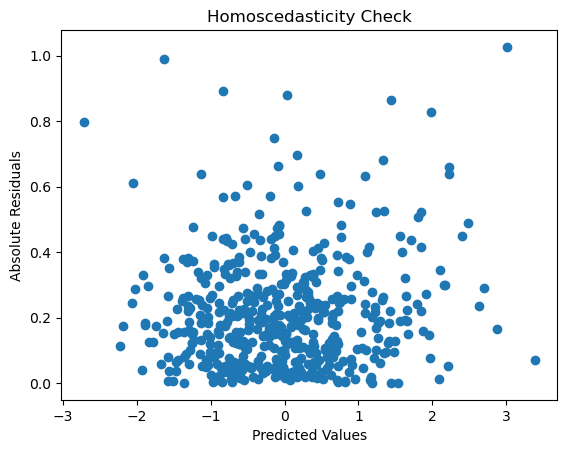

In [64]:
plt.scatter(y_pred,abs(residuals))
plt.xlabel("Predicted Values")
plt.ylabel("Absolute Residuals")
plt.title("Homoscedasticity Check")